In [129]:
import os
import numpy as np
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "./config/windy-nova-364604-7a2df3513239.json"
from google.cloud import vision
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [124]:
path = "/Users/kyoma/Desktop/img/mid.png"

client = vision.ImageAnnotatorClient()
with io.open(path, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)
response = client.document_text_detection(image=image)
print()

## example

In [131]:
blocks

[bounding_box {
  vertices {
    x: 14
    y: 16
  }
  vertices {
    x: 853
    y: 12
  }
  vertices {
    x: 855
    y: 534
  }
  vertices {
    x: 16
    y: 538
  }
}
paragraphs {
  bounding_box {
    vertices {
      x: 17
      y: 20
    }
    vertices {
      x: 463
      y: 14
    }
    vertices {
      x: 463
      y: 52
    }
    vertices {
      x: 17
      y: 58
    }
  }
  words {
    property {
      detected_languages {
        language_code: "en"
        confidence: 1.0
      }
    }
    bounding_box {
      vertices {
        x: 17
        y: 20
      }
      vertices {
        x: 294
        y: 16
      }
      vertices {
        x: 294
        y: 54
      }
      vertices {
        x: 17
        y: 58
      }
    }
    symbols {
      bounding_box {
        vertices {
          x: 17
          y: 21
        }
        vertices {
          x: 38
          y: 21
        }
        vertices {
          x: 38
          y: 58
        }
        vertices {
          x: 17
    

## test

In [179]:
    rets = []
    blocks = response.full_text_annotation.pages[0].blocks
    for block in blocks:
        for paragraph in block.paragraphs:
            font_size_list = []
            line_space_list = []
            last_y = 0
            text = ""
            # get test
            for word in paragraph.words:
                for symbol in word.symbols:
                    end = ""
                    type_ = str(symbol.property.detected_break.type_)
                    if type_=="BreakType.SPACE" or type_=="BreakType.EOL_SURE_SPACE" or type_=="BreakType.SURE_SPACE":
                        end = " "

                    if type_=="BreakType.EOL_SURE_SPACE":
                        # print(symbol.bounding_box.vertices[0].y-last_y)
                        line_space_list.append(symbol.bounding_box.vertices[0].y-last_y)
                        last_y = symbol.bounding_box.vertices[0].y
                        # print(last_y)
                        
                        
                    # print(symbol.text, end=end)
                    text += symbol.text + end
                    font_size_list.append(symbol.bounding_box.vertices[1].x - symbol.bounding_box.vertices[0].x)
            # get box
            vertices = ([(vertex.x, vertex.y) for vertex in paragraph.bounding_box.vertices])
            font_size = np.median(np.array(font_size_list))
            
#             if len(line_space_list):
            
            line_space = np.median(np.array(line_space_list)) / font_size
            if np.isnan(line_space) or line_space < 1.1 or line_space > 4:
                line_space = 1.5
        
            # print(line_space_list)
            # rets.append([text, vertices, font_size, line_space])
            rets.append([font_size, line_space])

    print(rets)

[[20.0, 1.5], [17.0, 1.5], [14.0, 3.0714285714285716], [15.0, 2.8]]


In [103]:
    rets = []

    blocks = response.full_text_annotation.pages[0].blocks
    for block in blocks:

        for paragraph in block.paragraphs:
            ret = []
            text = ""
            # get test
            for word in paragraph.words:
                for symbol in word.symbols:
                    end = ""
                    if str(symbol.property.detected_break.type_)=="BreakType.SPACE":
                        end = " "
                    # print(symbol.text, end=end)
                    text += symbol.text + end

            ret.append(text)
            # get box
            vertices = get_box(paragraph.bounding_box)
            ret.append(vertices)

        rets.append(ret)

TypeError: list.append() takes exactly one argument (0 given)

In [138]:
img = mpimg.imread(path)
img.shape

(536, 1786, 4)

In [35]:
tmp_img = img

In [36]:
tmp_img[207:418,16:489, :] = 0.5

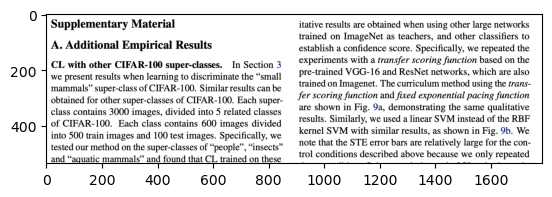

In [139]:
plt.imshow(img)